<figure>
  <IMG SRC="../../logo/logo.png" WIDTH=250 ALIGN="right">
</figure>

# IHE Python course, 2017

T.N.Olsthoorn, Feb 26, 2017

## Working with lists, dicts and sets and their comprehensions

### (Excercises, using 2017 world population data, reading data from Excel)

See Excel workbook in this folder

For this we list all files in the folder and check each if it has '.xls' in it and doesn't start with '~', because that means that the file is actually active in the Excel program.

In [70]:
from pprint import pprint
import matplotlib.pyplot as plt

Import the os module (operating system). It has the method `listdir()`, which gives a list of the files within a directory.

We apply os.listdir() to get a list of all files and immediately filter it to get only the files that have `.xls` and don't start with '~'

In [71]:
import os

In [72]:
os.listdir('.')

['.DS_Store',
 '.ipynb_checkpoints',
 'comprehensions.ipynb',
 'dicts.ipynb',
 'tuplesListsSets.ipynb',
 'worldPopulation.ipynb',
 'worldPopulation2017.xlsx']

In [73]:
import os

xls_files = [f for f in os.listdir() if ".xls" in f and not f.startswith('~')]

print(xls_files)

['worldPopulation2017.xlsx']


Next we'll read the data from the Excel workbook

In [74]:
import openpyxl # excel file functionality

wb = openpyxl.load_workbook(xls_files[0])

/Users/Theo/anaconda/lib/python3.5/site-packages/openpyxl/reader/worksheet.py:322: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [75]:
type(wb)

openpyxl.workbook.workbook.Workbook

In [76]:
wb.get_sheet_names()

['Population', 'CountriesByContinent', 'missing']

In [77]:
# Show the sheetnames inside the Excel workbook wb
wb.get_sheet_names()

['Population', 'CountriesByContinent', 'missing']

We can now treat the workbook as a dictionary in which each key is the name of a worksheet

In [78]:
wsPop = wb['Population']

In [79]:
type(wsPop)

openpyxl.worksheet.worksheet.Worksheet

wsPop is an object. It has a number of methods and properties, which can be accessed by typing the name followed by a dot followed by a tab. To get more information it can be followed by a question mark.

On the mac wsPop.rows is a tuple of tuples. On some other systems it is a generator. It generates the tuples one after the other in a loop like

In [80]:
for r in wsPop.rows:
    pass # do something

but with a generator, one cannot say len(wsPop.rows) or index it like wsPop.rows[3].

However it's easy to first generate a list of tuples with a comprehension:

In [81]:
data = [r for r in wsPop.rows]

and then continue to work with data instead of wsPop.rows. Therefore, if you have trouble indexing wsPop.rows, first generate a list as shown above and use that wherever you see wsPop.rows below.

In [82]:
cel = wsPop.rows[0][3]  # may not work if wsPop.rows is a generator on your system and not a tuple of tuple.
cel = data[0][3]  # this is a list of tuples, generated above.

In [83]:
cel.value

'Yearly'

We gen get the contents of sheet as a series of rows using the attribute `rows`,

and then show an arbitrary value

In [85]:
print( type(wsPop.rows) )  # shows that the wsPop generates a tuple of tuples

print( len(wsPop.rows) ) # shows the number of rows

print( wsPop.rows[3][1] ) # shows some cell

wsPop.rows[3][1].value # shows the value of some cell

<class 'tuple'>
235
<Cell Population.B4>


'India'

In [86]:
for r in wsPop.rows:
    print(r[1].value)

Country (or dependency)
None
China
India
U.S.
Indonesia
Brazil
Pakistan
Nigeria
Bangladesh
Russia
Mexico
Japan
Ethiopia
Philippines
Viet Nam
Egypt
DR Congo
Iran
Germany
Turkey
Thailand
U.K.
France
Italy
Tanzania
South Africa
Myanmar
South Korea
Colombia
Kenya
Spain
Ukraine
Argentina
Sudan
Uganda
Algeria
Iraq
Poland
Canada
Morocco
Afghanistan
Saudi Arabia
Peru
Venezuela
Malaysia
Uzbekistan
Mozambique
Nepal
Ghana
Yemen
Angola
Madagascar
North Korea
Australia
Cameroon
Côte d'Ivoire
Taiwan
Niger
Sri Lanka
Romania
Burkina Faso
Syria
Mali
Chile
Malawi
Kazakhstan
Zambia
Netherlands
Guatemala
Ecuador
Zimbabwe
Cambodia
Senegal
Chad
Guinea
South Sudan
Rwanda
Burundi
Tunisia
Benin
Belgium
Somalia
Cuba
Bolivia
Haiti
Greece
Dominican Republic
Czech Republic
Portugal
Azerbaijan
Sweden
Hungary
Belarus
United Arab Emirates
Tajikistan
Serbia
Austria
Switzerland
Israel
Honduras
Papua New Guinea
Jordan
Togo
Hong Kong
Bulgaria
Laos
Paraguay
Sierra Leone
Libya
Nicaragua
El Salvador
Kyrgyzstan
Lebanon
Singa

Turn the rows propery into a list of rows, with each row the values of the cells in them.

We can do that in a list comprehension, in this case a list comprehension around a list comprehension.

For each row we turn it into a list of the values of each cell in that row.
We do that for each row.

The result is a list of lists. This is done in one line:

In [87]:
data = [[c.value for c in r ]   for r in wsPop.rows]

In [88]:
data[15][1]

'Viet Nam'

In [89]:
# Show the first 5 lines
for i in range(5):
    print(data[i])

['#', 'Country (or dependency)', 'Population', 'Yearly', 'Net', 'Density', 'Land Area', 'Migrants', 'Fert.', 'Med.', 'Urban']
[None, None, -2017, 'Change', 'Change', '(P/Km²)', '(Km²)', '(net)', 'Rate', 'Age', 'Pop %']
[1, 'China', 1388232693, 0.0043, 5909361, 148, 9386293, -360000, 1.55, 37, 0.576]
[2, 'India', 1342512706, 0.0118, 15711130, 452, 2973450, -519644, 2.48, 27, 0.32]
[3, 'U.S.', 326474013, 0.0073, 2355226, 36, 9144930, 1001577, 1.89, 38, 0.821]


To index the data directly, we don't want a list of lists but a dictionary with the country name as key, such that for country the data is kept in a dictionary with keys obtained form the headers in the first two rows of the excel file as is shown above.


In [90]:
hdrs = data[0]
dims = data[1]

print()
print(hdrs)
print()
print(dims)
print()


['#', 'Country (or dependency)', 'Population', 'Yearly', 'Net', 'Density', 'Land Area', 'Migrants', 'Fert.', 'Med.', 'Urban']

[None, None, -2017, 'Change', 'Change', '(P/Km²)', '(Km²)', '(net)', 'Rate', 'Age', 'Pop %']



Now glue together the hdrs and the dimes, and filter out the None texts:

All `hdrs` are strings, but that is not the case of the `dims`, where -2017 was turned in a value.

So when guening h and d together to a new string below, we have to use h + str(d).

The combined headers are obtained using a list comprehension, that also removes the text 'None' from the `dims` wherever it turns up:

In [91]:
hdrs = [(h + str(d)).replace('None','')  for h, d in zip(hdrs, dims)]


pprint(hdrs)

['#',
 'Country (or dependency)',
 'Population-2017',
 'YearlyChange',
 'NetChange',
 'Density(P/Km²)',
 'Land Area(Km²)',
 'Migrants(net)',
 'Fert.Rate',
 'Med.Age',
 'UrbanPop %']


In [92]:
h = data[13][:]


In [93]:
print(h)
name = h.pop(1)
print(name)
print(h)

[12, 'Ethiopia', 104344901, 0.0245, 2491633, 104, 1000430, -12000, 4.59, 19, 0.194]
Ethiopia
[12, 104344901, 0.0245, 2491633, 104, 1000430, -12000, 4.59, 19, 0.194]


We could generate a dict with the country names as keys where each cntry[key] as a list of itmes. We cannot use a dict comprehension here because we need to pop the country value from each row in to get the key for that rows. Hence a for loop is used:

In [94]:
cntry = dict() # empty dict

for i in range(2, len(wsPop.rows)):
    row = [c.value for c in wsPop.rows[i]]
    cname = row.pop(1)
    cntry[cname] = row # entter the key  cname and the value row into the dict cntry

Now we can get the data of any cntry like so:

In [95]:
cntry['Italy']

[23, 59797978, -0.0001, -3026, 203, 294137, 105654, 1.43, 46, 0.707]

However, this is not smart enough. We can't see what the figure in the list mean. Therefore, we should use a dictionary for the contents of each cntry with the fields as keys.

These fields are now simply obtained by popping the second item from the hdrs list:

In [96]:
print(hdrs)
hdrs.pop(1)
print()
print(hdrs)

['#', 'Country (or dependency)', 'Population-2017', 'YearlyChange', 'NetChange', 'Density(P/Km²)', 'Land Area(Km²)', 'Migrants(net)', 'Fert.Rate', 'Med.Age', 'UrbanPop %']

['#', 'Population-2017', 'YearlyChange', 'NetChange', 'Density(P/Km²)', 'Land Area(Km²)', 'Migrants(net)', 'Fert.Rate', 'Med.Age', 'UrbanPop %']


Now generate the dict again, with the contens of each cntry itself a dict of its fields:

In [97]:
cntry = dict()
for i in range(2, len(wsPop.rows)):  # skip the first two lines, which are headers
    
    row = [c.value for c in wsPop.rows[i]] # turn the Excel row in a list
  
    cname = row.pop(1)      # pop of the country name, which becomes the key
    
    cntry[cname] = {fld: v for fld, v in zip(hdrs, row)}  # use dict comprehension

Now the contents of an arbitrary country looks like this, it's a dict with fields and values.

In [98]:
cntry['Netherlands']['Population-2017']

17032845

Let's now compute the total population of the world.
We do this by summing for each country.

In [99]:
totPop2017 = 0.  # start out with zero

for c in cntry.keys():
    totPop2017 += cntry[c]['Population-2017'] # get the value directly from indexing the field

print('Total population in the world is {:.2f} billion'.format(totPop2017/1e9))

Total population in the world is 7.52 billion


In [100]:
# Now compute the toal populatin in 30 years, using the current growth rates

popWorld = [0 for i in range(1, 31)]
for k in cntry.keys():
    pc  = cntry[k]['Population-2017']   # country population 2017
    try:
        frc = cntry[k]['Fert.Rate'] / 100.  # growth rate fraction
    except:
        # needed in case frc contains `None`
        frc = 0 # simply use 0 in those cases

    # for the country
    popCntry = [pc * (1 + frc)**i for i in range(1, 31) ]
    
    # for the entire world
    popWorld = [pc + pw for pc, pw in zip(popCntry, popWorld)]

for i, pw in enumerate(popWorld):
    yr = 2017 + i + 1
    print('popWorld [{}] = {:5.2f} billion'.format(yr, pw/1e9))

popWorld [2018] =  7.71 billion
popWorld [2019] =  7.91 billion
popWorld [2020] =  8.11 billion
popWorld [2021] =  8.32 billion
popWorld [2022] =  8.54 billion
popWorld [2023] =  8.77 billion
popWorld [2024] =  9.00 billion
popWorld [2025] =  9.24 billion
popWorld [2026] =  9.49 billion
popWorld [2027] =  9.74 billion
popWorld [2028] = 10.01 billion
popWorld [2029] = 10.29 billion
popWorld [2030] = 10.57 billion
popWorld [2031] = 10.87 billion
popWorld [2032] = 11.17 billion
popWorld [2033] = 11.49 billion
popWorld [2034] = 11.81 billion
popWorld [2035] = 12.15 billion
popWorld [2036] = 12.50 billion
popWorld [2037] = 12.87 billion
popWorld [2038] = 13.25 billion
popWorld [2039] = 13.64 billion
popWorld [2040] = 14.04 billion
popWorld [2041] = 14.47 billion
popWorld [2042] = 14.90 billion
popWorld [2043] = 15.36 billion
popWorld [2044] = 15.83 billion
popWorld [2045] = 16.32 billion
popWorld [2046] = 16.83 billion
popWorld [2047] = 17.36 billion


## Population per continent.

We don't have the `Continent` field associated with the countries. But we do have a list of countries and their continents in a second worksheet:

In [101]:
wscont = wb['CountriesByContinent'] # read it

print(wscont)  # shows it's a worksheet object

print(wscont.rows[0])  # shows it's a tuple of two cell objects

wscont.rows[0][0].value, wscont.rows[0][1].value  # turned into a tuple of tow strings

<Worksheet "CountriesByContinent">
(<Cell CountriesByContinent.A1>, <Cell CountriesByContinent.B1>)


('Africa', 'Algeria')

We can immediately, in a single line, turn this worksheet into a dictionary with name `cont` that has the country as key and the continent as field (a string).

In [102]:
cont = { v.value : k.value for k, v in wb['CountriesByContinent'] }

pprint(cont)  # notic the key : value pairs separated by commas

{'Afghanistan': 'Asia',
 'Albania': 'Europe',
 'Algeria': 'Africa',
 'Andorra': 'Europe',
 'Angola': 'Africa',
 'Antigua and Barbuda': 'N. America',
 'Argentina': 'S. America',
 'Armenia': 'Europe',
 'Australia': 'Oceania',
 'Austria': 'Europe',
 'Azerbaijan': 'Europe',
 'Bahamas': 'N. America',
 'Bahrain': 'Asia',
 'Bangladesh': 'Asia',
 'Barbados': 'N. America',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Belize': 'N. America',
 'Benin': 'Africa',
 'Bhutan': 'Asia',
 'Bolivia': 'S. America',
 'Bosnia and Herzegovina': 'Europe',
 'Botswana': 'Africa',
 'Brazil': 'S. America',
 'Brunei': 'Asia',
 'Bulgaria': 'Europe',
 'Burkina': 'Africa',
 'Burma (Myanmar)': 'Asia',
 'Burundi': 'Africa',
 'Cambodia': 'Asia',
 'Cameroon': 'Africa',
 'Canada': 'N. America',
 'Cape Verde': 'Africa',
 'Central African Republic': 'Africa',
 'Chad': 'Africa',
 'Chile': 'S. America',
 'China': 'Asia',
 'Colombia': 'S. America',
 'Comoros': 'Africa',
 'Congo': 'Africa',
 'Congo, Democratic Republic of': 'Af

Show for a few countries in which continent they are:

In [103]:
for c in ['Bahamas', 'Spain', 'Morocco', 'Honduras', 'Cambodia']:
    print('{:20} lies in {}'.format(c, cont[c]))

Bahamas              lies in N. America
Spain                lies in Europe
Morocco              lies in Africa
Honduras             lies in N. America
Cambodia             lies in Asia


### Adding the field `continent` to the `cntry` dict

We like to add the field `Continent` to our `cntry` dict using the `cont` dict.

This would be easy if the country names in both dicts would be exactly the same.

Let's see if this is the case.

We can check this using set logic.

Convert the keys of he `cntry` dict to a set and do the same with those of the `cont` dict

First step: What countries are in th `cont` dict that are not in the `cntry` dict?

In [104]:
df_cont_cntry = set(cont.keys()) - set(cntry.keys())
pprint(df_cont_cntry)

print("\n{} countries are in dict `cont` that are not in dict `cntry`".format(len(df_cont_cntry)))

{'Burkina',
 'Burma (Myanmar)',
 'Cape Verde',
 'Congo, Democratic Republic of',
 'East Timor',
 'Ivory Coast',
 'Korea, North',
 'Korea, South',
 'Macedonia',
 'Russian Federation',
 'Saint Vincent and the Grenadines',
 'United Kingdom',
 'United States',
 'Vatican City',
 'Vietnam'}

15 countries are in dict `cont` that are not in dict `cntry`


And likewise: which are in the `cntry` dict that are not in the `cont` dict?

In [105]:
df_cntry_cont = set(cntry.keys()) - set(cont.keys())
pprint(df_cntry_cont)

print("\n{} countries are in dict `cntry` that are not in dict `cont`".format(len(df_cntry_cont)))

{'American Samoa',
 'Anguilla',
 'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Burkina Faso',
 'Cabo Verde',
 'Caribbean Netherlands',
 'Cayman Islands',
 'Channel Islands',
 'Cook Islands',
 'Curaçao',
 "Côte d'Ivoire",
 'DR Congo',
 'Faeroe Islands',
 'Falkland Islands',
 'French Guiana',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Holy See',
 'Hong Kong',
 'Isle of Man',
 'Macao',
 'Martinique',
 'Mayotte',
 'Montserrat',
 'Myanmar',
 'New Caledonia',
 'Niue',
 'North Korea',
 'Northern Mariana Islands',
 'Puerto Rico',
 'Russia',
 'Réunion',
 'Saint Helena',
 'Saint Pierre and Miquelon',
 'Sint Maarten',
 'South Korea',
 'St. Vincent & Grenadines',
 'State of Palestine',
 'TFYR Macedonia',
 'Taiwan',
 'Timor-Leste',
 'Tokelau',
 'Turks and Caicos Islands',
 'U.K.',
 'U.S.',
 'United States Virgin Islands',
 'Viet Nam',
 'Wallis and Futuna',
 'Western Sahara'}

54 countries are in dict `cntry` that are not in dict `cont`


The set of contries that are in `cont` but not in `cntry` obviously have differently spelled names.
Probably the easiest way is to take the names from `cntry` that are not in `cont` and look up the continent in which each of these contries lies, and use that to supplement the missing countries. We don't then have to worry about the misspelled names.

### Using a list of missing names with their continent to complete the `cntry` dict

This list of missing contries with their continent is in sheet `missed` of our workbook.

In [106]:
# notice that the columsns in this excel sheet are in columns 2 and 3 and not in 1 and 2 !!
# We construct the dict in one line, using a single dict comprehension

missing = {rw[2].value : rw[1].value for rw in wb['missing']}  # don't need .rows

pprint(missing)

{None: None,
 'American Samoa': 'N. America',
 'Anguilla': 'N. America',
 'Aruba': 'S. America',
 'Bermuda': 'S. America',
 'British Virgin Islands': 'N. America',
 'Burkina Faso': 'Africa',
 'Cabo Verde': 'Africa',
 'Caribbean Netherlands': 'N. America',
 'Cayman Islands': 'N. America',
 'Channel Islands': 'Europe',
 'Cook Islands': 'Oceania',
 'Curaçao': 'S. America',
 "Côte d'Ivoire": 'Africa',
 'DR Congo': 'Africa',
 'Faeroe Islands': 'Europe',
 'Falkland Islands': 'S. America',
 'French Guiana': 'S. America',
 'French Polynesia': 'Oceania',
 'Gibraltar': 'Europe',
 'Greenland': 'N. America',
 'Guadeloupe': 'N. America',
 'Guam': 'Oceania',
 'Holy See': 'Africa',
 'Hong Kong': 'Africa',
 'Isle of Man': 'Europe',
 'Macao': 'Asia',
 'Martinique': 'S. America',
 'Mayotte': 'Africa',
 'Montserrat': 'N. America',
 'Myanmar': 'Asia',
 'New Caledonia': 'Oceania',
 'Niue': 'Oceania',
 'North Korea': 'Asia',
 'Northern Mariana Islands': 'Oceania',
 'Puerto Rico': 'N. America',
 'Russia': 'E

Now we can complete our cntry dict with a `Continent` attribute for every country in it by using the dict `cont` and the dict `missing`.

Let's just join them, like so:

In [107]:
for k in missing.keys():
    cont[k] = missing[k]

And then add the continent to the `cntry` dict

In [108]:
for k in cntry.keys():
    cntry[k]['Continent'] = cont[k]

Now we can print the country name with its continent next to it:

In [109]:
for k in cntry.keys():
    print("{:30} lies in {}".format(k, cntry[k]['Continent']))

Timor-Leste                    lies in Asia
Solomon Islands                lies in Oceania
Liechtenstein                  lies in Europe
Swaziland                      lies in Africa
Macao                          lies in Asia
Angola                         lies in Africa
Turks and Caicos Islands       lies in N. America
Sudan                          lies in Africa
Falkland Islands               lies in S. America
Saint Kitts and Nevis          lies in N. America
Uganda                         lies in Africa
Laos                           lies in Asia
Cambodia                       lies in Asia
Mauritania                     lies in Africa
Belgium                        lies in Europe
Canada                         lies in N. America
Wallis and Futuna              lies in Oceania
Guam                           lies in Oceania
Curaçao                        lies in S. America
Azerbaijan                     lies in Europe
Singapore                      lies in Asia
Niger                

## Population growth per continent

It is now possible to compute and show the population and its growth per continent

The first step is extract the continents from the dict using set logic, i.e. by set comprehension. The result is a set with the unique values from the `Continent` field.

In [110]:
continents = { cntry[k]['Continent'] for k in cntry.keys()} # set comprehension

print(continents)

{'Asia', 'Africa', 'Oceania', 'Europe', 'S. America', 'N. America'}


It's then possible to compute the future population be selecting the countries for this continent to do the computation on:

In [111]:
continent='Europe'

# population and fertility rate for the countries of this continent:
popCont =  [(cntry[k]['Population-2017'], cntry[k]['Fert.Rate']) for k in cntry.keys() if cntry[k]['Continent']==continent]

print("The number of countries in {} is {}".format(continent, len(popCont)))

The number of countries in Europe is 51


The last but one step is to compute the population for the coming years in each continent. We make a dictionary `pTot` with the continent as key and which has the list of future population values as a list:

In [112]:
pTot = dict()  # empty dict
Nyr = 50  # year to predict
print("The predicted population inover the next {} years is:".format(Nyr))

for c in continents:
    pTot[c] = [0 for i in range(Nyr)] # start with empty total for each continent
    
    # generate a list of [Pop, fertility rate] for each country in this continent
    popCont =  [(cntry[k]['Population-2017'], cntry[k]['Fert.Rate'])
                            for k in cntry.keys() if cntry[k]['Continent'] == c]

    # compute the country's future population and add to continentn total
    for p, fr in popCont:
        try:
            p  = float(p)
            fr = float(fr)
            # population of country in coming years
            pcntry = [p * (1 + fr/100.)**i for i in range(1, Nyr + 1)]
            
            # add to continent total
            pTot[c]= [pt + p for pt, p in zip(pTot[c], pcntry)]        
        except:
            # it crashes when fertility rate is 'None', we ignore these frew contries
            pass
        
    print("{:10s}".format(c), end="")  # print continent
    for p in pTot[c]:
           print("{:6.2f}".format(p / 1.0e9), end="") # print Pop values
    print()

The predicted population inover the next 50 years is:
Asia        4.50  4.60  4.70  4.81  4.91  5.02  5.14  5.25  5.37  5.49  5.62  5.74  5.87  6.01  6.15  6.29  6.43  6.58  6.73  6.89  7.05  7.21  7.38  7.55  7.73  7.91  8.10  8.29  8.48  8.69  8.89  9.10  9.32  9.55  9.78 10.01 10.26 10.50 10.76 11.02 11.29 11.57 11.86 12.15 12.45 12.76 13.08 13.41 13.74 14.09
Africa      1.36  1.43  1.50  1.57  1.64  1.72  1.80  1.89  1.98  2.07  2.17  2.28  2.39  2.51  2.63  2.76  2.90  3.04  3.19  3.35  3.52  3.70  3.88  4.08  4.28  4.50  4.73  4.97  5.23  5.50  5.78  6.08  6.39  6.72  7.07  7.44  7.83  8.24  8.68  9.13  9.62 10.12 10.66 11.23 11.83 12.46 13.13 13.83 14.57 15.36
Oceania     0.04  0.04  0.04  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.06  0.06  0.06  0.06  0.06  0.06  0.07  0.07  0.07  0.07  0.07  0.07  0.08  0.08  0.08  0.08  0.08  0.09  0.09  0.09  0.09  0.10  0.10  0.10  0.10  0.11  0.11  0.11  0.11  0.12  0.12  0.12  0.13  0.13  0.13  0.14  0.14  0.15
Europe      0

A better overview of the results would be to have columns, one per continent, and the numbers vertical, with the year as first column. Although the numbers are now not naturally ordered to do this, it can be realized with little effort as follows:

In [113]:
print("The predicted population in billions:")

continents = pTot.keys()

styear = 2018 # starting year
print("{:4s}".format("Year"), end="")
for c in continents:
    print("{:>12}".format(c), end="")

print()
for i in range(Nyr):
    print("{:4d}".format(styear + i), end="")
    for c in continents:
        print("{:12.2f}".format(pTot[c][i]/1e9), end="")
    print()
        

The predicted population in billions:
Year      Europe  S. America        Asia  N. America      Africa     Oceania
2018        0.77        0.44        4.50        0.59        1.36        0.04
2019        0.78        0.45        4.60        0.61        1.43        0.04
2020        0.79        0.45        4.70        0.62        1.50        0.04
2021        0.81        0.46        4.81        0.63        1.57        0.05
2022        0.82        0.47        4.91        0.65        1.64        0.05
2023        0.83        0.48        5.02        0.66        1.72        0.05
2024        0.85        0.49        5.14        0.67        1.80        0.05
2025        0.86        0.50        5.25        0.69        1.89        0.05
2026        0.87        0.51        5.37        0.70        1.98        0.05
2027        0.89        0.52        5.49        0.71        2.07        0.05
2028        0.90        0.54        5.62        0.73        2.17        0.05
2029        0.92        0.55        5.

Finally, make a plot of the growth curves:

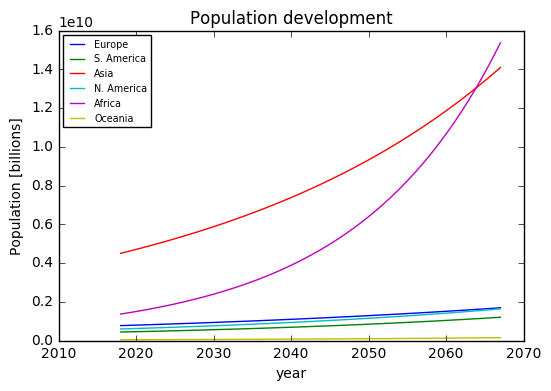

In [114]:
years = [2018 + i for i in range(Nyr)]
for c in continents:
    plt.plot(years, pTot[c], label=c)
plt.xlabel('year')
plt.ylabel('Population [billions]')
plt.title('Population development')
plt.legend(loc='best', fontsize='x-small')
plt.show()

In [116]:
#plt.pie?

We can also put the year results in a dict that has as key the year and as values a dict with the continents.


In [117]:
contPop = dict()
for yr in range(Nyr):
    contPop[2018 + yr] = { c : v for c, v in zip(continents, [pTot[c][yr] for c in continents])}

# show it
pprint(contPop[2025])

{'Africa': 1887126768.7242863,
 'Asia': 5251901043.984403,
 'Europe': 859888151.1738987,
 'N. America': 686011271.3401413,
 'Oceania': 49759904.37036097,
 'S. America': 503160315.91965014}


Then finally we could make pie charts for the population at say 4 points in time.

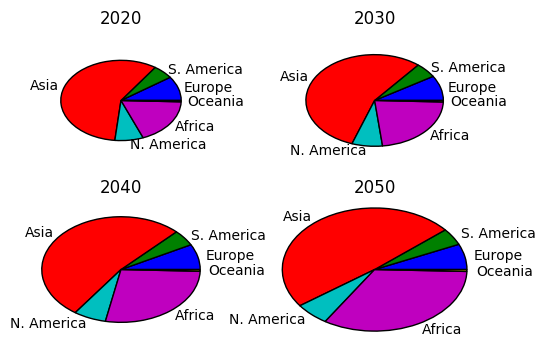

In [118]:
import numpy as np

fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
axs = axs.ravel()

for ax, yr in zip(axs.ravel(), [2020, 2030, 2040,2050]):
    ax.set_title(str(yr))  
    x = np.array(list(contPop[yr].values()))/1.0e9
    y = list(contPop[yr].keys())
    #print(x)
    #print(y)
    r = np.sqrt(np.sum(x))/4
    ax.xlim = []
    ax.pie(x, labels=y, radius=r)
plt.show()